In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split

my_file = pd.read_json("F:/graduate study/semester2/660/final project/train.json")
test_file = pd.read_json("F:/graduate study/semester2/660/final project/test.json")

train_data = pd.DataFrame(my_file)
test_data = pd.DataFrame(test_file)

train_data['interest_level'] = train_data['interest_level'].map({'low': -1, 'medium': 0,'high':1})

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],0,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",-1,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",1,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",-1,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],-1,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
test_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


In [4]:
train_data["des_number"] = train_data.description.str.len()
train_data["features_number"] = train_data.features.str.len()
train_data["photo_number"] = train_data.photos.str.len()


test_data["des_number"] = test_data.description.str.len()
test_data["features_number"] = test_data.features.str.len()
test_data["photo_number"] = test_data.photos.str.len()

In [5]:
train_data = train_data[['bathrooms','bedrooms','price','latitude','longitude','interest_level','des_number','photo_number','features_number','listing_id']]
test_data = test_data[['bathrooms','bedrooms','price','latitude','longitude','des_number','features_number','photo_number','listing_id']]

print(train_data.head())
print(test_data.head())

        bathrooms  bedrooms  price  latitude  longitude  interest_level  \
10            1.5         3   3000   40.7145   -73.9425               0   
10000         1.0         2   5465   40.7947   -73.9667              -1   
100004        1.0         1   2850   40.7388   -74.0018               1   
100007        1.0         1   3275   40.7539   -73.9677              -1   
100013        1.0         4   3350   40.8241   -73.9493              -1   

        des_number  photo_number  features_number  listing_id  
10             588             5                0     7211212  
10000            8            11                5     7150865  
100004         691             8                4     6887163  
100007         492             3                2     6888711  
100013         479             3                1     6934781  
        bathrooms  bedrooms  price  latitude  longitude  des_number  \
0             1.0         1   2950   40.7185   -73.9865         587   
1             1.0      

                 bathrooms  bedrooms     price  latitude  longitude  \
bathrooms         1.000000  0.533446  0.069661 -0.009657   0.010393   
bedrooms          0.533446  1.000000  0.051788 -0.004745   0.006892   
price             0.069661  0.051788  1.000000 -0.000707  -0.000087   
latitude         -0.009657 -0.004745 -0.000707  1.000000  -0.966807   
longitude         0.010393  0.006892 -0.000087 -0.966807   1.000000   
interest_level   -0.082573  0.027293 -0.023783  0.004804  -0.004752   
des_number        0.150461  0.111410  0.009144 -0.003696  -0.000811   
photo_number      0.147980  0.154515  0.004559 -0.008221   0.005740   
features_number   0.230389  0.129996  0.024273  0.000833  -0.008338   
listing_id        0.000776  0.011968  0.008090  0.001712  -0.000907   

                 interest_level  des_number  photo_number  features_number  \
bathrooms             -0.082573    0.150461      0.147980         0.230389   
bedrooms               0.027293    0.111410      0.154515     

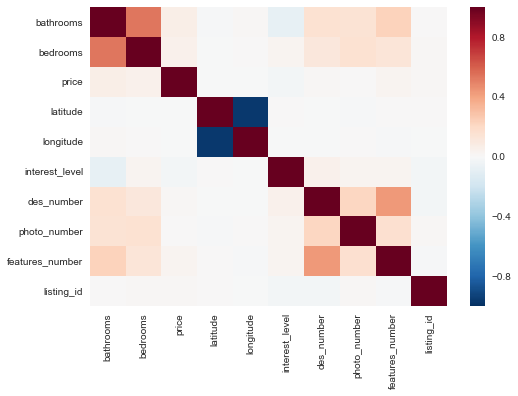

In [6]:
corr_matx = train_data.corr()
print(corr_matx)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matx)
plt.show()

In [7]:
y_train = train_data['interest_level'].values
x_train = train_data[['bathrooms','bedrooms','price','latitude','longitude','des_number','photo_number','features_number','listing_id']]
#x_train[:4]

x_test= test_data[['bathrooms','bedrooms','price','latitude','longitude','des_number','photo_number','features_number','listing_id']]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



model = LogisticRegression()
model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
probs = model.predict_proba(x_test)

In [ ]:
probs = pd.DataFrame(probs)
probs.columns=["high","medium","low",'listing_id']
probs["listing_id"] = test_data.listing_id.values
probs.to_csv("Third2.csv", index=False)
